In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cars-wagonr-swift/data/train/swift/2ovct1n6q0p01-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/swift/etnhjxsinmel3-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/swift/onddsbq63q3t3-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/swift/cwf8s7l35k6v-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/swift/1tktgc5pe6mi3-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/swift/c240ldg7vhfq-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/swift/nmt7rxpntdow1-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/swift/mz6qmfzco3fd-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/swift/1jndb0tu4ndi2-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/swift/w6cjsq4v5j623-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/swift/1ps8rnzvn7ho2-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/swift/yalobh0kiaq-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/swift/shgxmhycoxes2-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/swift/r22k958ajs552-IN.jpg
/kaggle/input/cars-wagonr

/kaggle/input/cars-wagonr-swift/data/train/wagonr/i9wfrtc2a6h53-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/wagonr/gz8u6gmmdutf3-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/wagonr/yzcxn0suwsgk1-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/wagonr/hx7klc4ks04w2-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/wagonr/ydmyx549whmg3-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/wagonr/pxqtkndt5oop2-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/wagonr/lqpw7tlxbmo61-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/wagonr/zk3etzh75mh61-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/wagonr/lkvjo38466551-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/wagonr/14vplnltnbgn1-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/wagonr/ycc2imiw3kcu2-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/wagonr/jav87fz2jas33-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/wagonr/vtewn5hqlezu2-IN.jpg
/kaggle/input/cars-wagonr-swift/data/train/wagonr/xo9en777nlw31-IN.jpg
/kaggl

/kaggle/input/cars-wagonr-swift/data/test/swift/bc8d6r0gkefd3-IN.jpg
/kaggle/input/cars-wagonr-swift/data/test/swift/n2g6jlmfpbdi-IN.jpg
/kaggle/input/cars-wagonr-swift/data/test/swift/7f7hld5xi1d82-IN.jpg
/kaggle/input/cars-wagonr-swift/data/test/swift/hw3ptqhwjv422-IN.jpg
/kaggle/input/cars-wagonr-swift/data/test/swift/zsj7f2up7ge1-IN.jpg
/kaggle/input/cars-wagonr-swift/data/test/swift/ilfk3sn21oob-IN.jpg
/kaggle/input/cars-wagonr-swift/data/test/swift/bswg60yhpxps3-IN.jpg
/kaggle/input/cars-wagonr-swift/data/test/swift/le7jczjiinag2-IN.jpg
/kaggle/input/cars-wagonr-swift/data/test/swift/ev1yiga52pig-IN.jpg
/kaggle/input/cars-wagonr-swift/data/test/swift/e20hkaaiiwux-IN.jpg
/kaggle/input/cars-wagonr-swift/data/test/swift/vk4rqyd001ou1-IN.jpg
/kaggle/input/cars-wagonr-swift/data/test/swift/ms4eqzee9h9n3-IN.jpg
/kaggle/input/cars-wagonr-swift/data/test/swift/gjvd8r9tsfc41-IN.jpg
/kaggle/input/cars-wagonr-swift/data/test/swift/yapfj6za5uvm3-IN.jpg
/kaggle/input/cars-wagonr-swift/data/te

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os, math, random, time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from PIL import Image

import torch.nn as nn
import torch
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim

from collections import defaultdict

In [3]:
def timer_start():
    global t0
    t0 = time.time()
    
def timer_end():   
    print('Time elapsed {:0.1f}s'.format(time.time() - t0))  

def display_grid(data, path, w =10, h =10, columns = 4, rows = 5):
    fig=plt.figure(figsize=(12, 8))
    for i in range(1, columns*rows +1):
        file = data[i]
        file = os.path.join(path, file)
        img = Image.open(file)
        fig.add_subplot(rows, columns, i)
        imshow(img)
    plt.show()
    
def get_best_epcoh(history):
    valid_acc = history['val_acc']
    best_epoch = valid_acc.index(max(valid_acc)) +1
    best_acc =  max(valid_acc)
    print('Best Validation Accuracy Score {:0.5f}, is for epoch {}'.format( best_acc, best_epoch))
    return best_epoch

def plot_results(history):
    tr_acc = history['tr_acc']
    val_acc = history['val_acc']
    tr_loss = history['tr_loss']
    val_loss = history['val_loss']
    epochs = history['epoch']

    plt.figure(figsize = (24, 6))
    plt.subplot(1,2,1)
    plt.plot(epochs, tr_acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')  
    
    plt.subplot(1,2,2)
    plt.plot(epochs, tr_loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    plt.show()
    
def set_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    
def online_mean_and_sd(loader):
    """Compute the mean and sd in an online fashion

        Var[x] = E[X^2] - E^2[X]
    """
    cnt = 0
    fst_moment = torch.empty(3)
    snd_moment = torch.empty(3)

    for images, _ in loader:

        b, c, h, w = images.shape
        nb_pixels = b * h * w
        sum_ = torch.sum(images, dim=[0, 2, 3])
        sum_of_square = torch.sum(images ** 2, dim=[0, 2, 3])
        fst_moment = (cnt * fst_moment + sum_) / (cnt + nb_pixels)
        snd_moment = (cnt * snd_moment + sum_of_square) / (cnt + nb_pixels)

        cnt += nb_pixels

    return fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)

# Class Swift


In [4]:
base_dir = '/kaggle/input/cars-wagonr-swift/data/'
train_swift = os.listdir(os.path.join(base_dir, 'train/swift') )
val_swift  = os.listdir(os.path.join(base_dir, 'validation/swift') )
test_swift  =  os.listdir(os.path.join(base_dir, 'test/swift') )
print('Instances for Class Swift: Train {}, Validation {} Test {}'.format(len(train_swift), len(val_swift), len(test_swift)))

Instances for Class Swift: Train 1200, Validation 400 Test 400


In [5]:
val_train = [x for x in val_swift if x in train_swift]
test_train = [x for x in test_swift if x in train_swift]
val_test =  [x for x in test_swift if x in val_swift]
len(val_train), len(test_train), len(val_test)

(0, 0, 0)

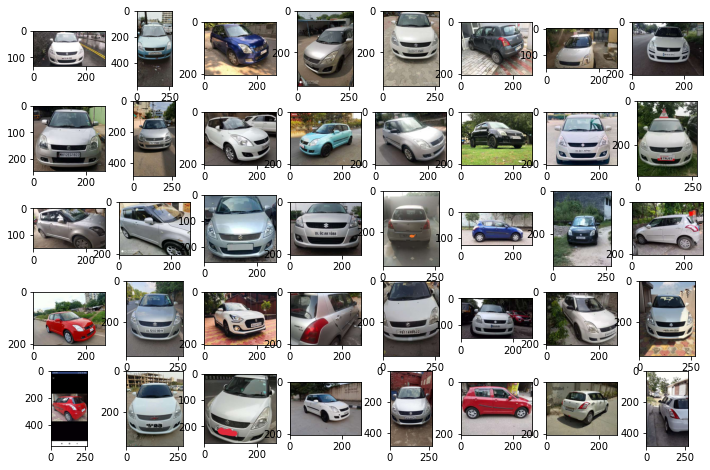

In [6]:
display_grid(data = train_swift, path = os.path.join(base_dir, 'train/swift'), w =10, h =10, columns = 8, rows = 5)

# Class Wagonr


In [7]:
train_wr = os.listdir(os.path.join(base_dir, 'train/wagonr') )
val_wr  = os.listdir(os.path.join(base_dir, 'validation/wagonr') )
test_wr  =  os.listdir(os.path.join(base_dir, 'test/wagonr') )
print('Instances for Class Wagonr: Train {}, Validation {} Test {}'.format(len(train_swift), len(val_swift), len(test_swift)))


Instances for Class Wagonr: Train 1200, Validation 400 Test 400


In [8]:
val_train = [x for x in val_wr if x in train_wr]
test_train = [x for x in test_wr if x in train_wr]
val_test =  [x for x in test_wr if x in val_wr]
len(val_train), len(test_train), len(val_test)

(0, 0, 0)

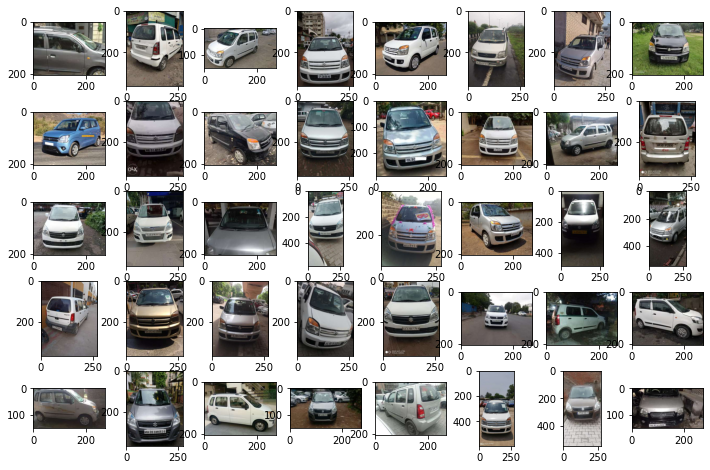

In [9]:
display_grid(data = train_wr, path = os.path.join(base_dir, 'train/wagonr'), w =10, h =10, columns = 8, rows = 5)

# Data Preprocessing


In [10]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation' )

transform = transforms.Compose( [                                  
                                 transforms.Resize((150,150)), 
                                 transforms.ToTensor(),
                                  ])

trainset = torchvision.datasets.ImageFolder( root= train_dir ,
                                              transform=transform
                                               )

trainloader = torch.utils.data.DataLoader(trainset, batch_size= 512 ,
                                          shuffle=True, num_workers=1)
mean, std = online_mean_and_sd(trainloader)
print(mean, std)

tensor([0.4508, 0.4365, 0.4216]) tensor([0.2561, 0.2542, 0.2592])


In [11]:
BATCH_SIZE = 20
# transforms.ToTensor() trasnforms the pixels from [0,255] to [0,1] which is then 
# trasnformed to [-1,1] using Normalize with mean computed mean and std for each of three channels
transform = transforms.Compose( [                                  
                                 transforms.Resize((150,150)), 
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean, std),
                                  ])

trainset = torchvision.datasets.ImageFolder( root= train_dir ,
                                              transform=transform
                                               )


trainloader = torch.utils.data.DataLoader(trainset, batch_size= BATCH_SIZE,
                                          shuffle=True, num_workers=1)


validset = torchvision.datasets.ImageFolder( root= validation_dir ,
                                              transform=transform
                                               )


validloader = torch.utils.data.DataLoader(validset , batch_size= BATCH_SIZE,
                                          shuffle=True, num_workers=1)
#Verify that mean is 0 and SD = 1
print(online_mean_and_sd(trainloader))

(tensor([-1.0608e-06, -2.5612e-06, -2.4840e-06]), tensor([1.0000, 1.0000, 1.0000]))


# Build CNN model


In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels= 3, out_channels=32, kernel_size= 3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride= 2)
        
        self.conv2 =  nn.Conv2d(in_channels= 32, out_channels= 64, kernel_size= 3)
        self.conv3 =  nn.Conv2d(in_channels= 64, out_channels= 128, kernel_size= 3)
        self.conv4 =  nn.Conv2d(in_channels= 128, out_channels= 128, kernel_size= 3)
    
#       128 * 128 * 7 is the output of the last max pool layer
        self.fc1 = nn.Linear(128 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 2)
       

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        
        #this is similar to flatten in keras but keras is smart to figure out dimensions by iteself.
        x = x.view(-1, 128 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
       
        return x

# Train Model


In [13]:
def train(model, epoch, train_loader, optimizer, criterion) :   
    model.train()
    epoch_loss = correct = 0
    for i, data in enumerate(train_loader, 0):
        # Load images with gradient accumulation capabilities
        inputs, labels = data[0].to(device), data[1].to(device)
        # Clear gradients w.r.t. parameters       
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(inputs)

         # Calculate Loss: softmax --> cross entropy loss
        loss =  criterion(outputs, labels)
        
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)           

        # Total correct predictions 
        correct += (predicted == labels).sum().item()  

        # Getting gradients w.r.t. parameters
        loss.backward()

         # Updating parameters
        optimizer.step() 
        
        #Multiple loss by number of batch as loss is averaged per batch
        epoch_loss += outputs.shape[0] * loss.item()
        
    accuracy = correct / len(train_loader.dataset)
    epoch_loss = epoch_loss / len(train_loader.dataset)
    return epoch_loss, accuracy


def test(model, epoch, test_loader, optimizer, criterion):
    model.eval()
    epoch_loss = correct = 0

    with torch.no_grad():
        #Iterate through test dataset after every epoch
        for i, data in enumerate(test_loader, 0):
            images, labels = data[0].to(device), data[1].to(device)
            # Forward pass only to get logits/output
            outputs = model(images)

            # Calculate Validation Loss
            loss =    criterion(outputs, labels)

            # Get predictions from the maximum value
            _, predicted = torch.max(outputs.data, 1)           

            # Total correct predictions 
            correct += (predicted == labels).sum().item()  

             #Multiple loss by number of batch as loss is averaged per batch so that we get
            #total loss over an epoch and then divide by number of samples to get loss per epcoh
            epoch_loss += outputs.shape[0] * loss.item()

    
    accuracy = correct / len(test_loader.dataset)
    epoch_loss = epoch_loss / len(test_loader.dataset)
  
    return epoch_loss, accuracy 

# Set Loss Function and Optimizers

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Net()
model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.0001)
print('Divice: ',device)
model

Divice:  cpu


Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=6272, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

# Train and Validate

In [15]:
%%time
EPOCHS = 20

#To get reprodicible results but not working at mommnet
# set_seed(42)

train_list  = os.listdir(os.path.join(base_dir, 'train/swift') ) + os.listdir(os.path.join(base_dir, 'train/wagonr') )
num_batches = math.ceil(len(train_list) / BATCH_SIZE)

print('Number of Training samples {}, Batch Size {}, Num Batch {}'.format( len(train_list), BATCH_SIZE, num_batches ))

history = defaultdict(list)


# Get Keras like outputs for Training and validation by using custom train and test functions.
for epoch in range( EPOCHS):  
    timer_start()
    print('[Epoch {} of {}]'.format(epoch +1, EPOCHS), end = ' ')
    tr_loss, tr_acc = train(model, epoch, trainloader, optimizer, criterion)

    val_loss, val_acc = test(model, epoch, validloader, optimizer, criterion)  
    timer_end()
    print('tr_loss: {:0.4f},tr_acc {:0.4f}| val_loss {:0.4f}, val_acc {:0.4f}'.format(tr_loss, tr_acc , val_loss, val_acc))
    history['epoch'].append(epoch+1)
    history['tr_loss'].append(round(tr_loss,5))
    history['tr_acc'].append(round(tr_acc,5))
    history['val_loss'].append(round(val_loss,5))
    history['val_acc'].append(round(val_acc,5))

Number of Training samples 2400, Batch Size 20, Num Batch 120
[Epoch 1 of 20] Time elapsed 77.1s
tr_loss: 0.6649,tr_acc 0.5883| val_loss 0.6005, val_acc 0.6587
[Epoch 2 of 20] Time elapsed 76.4s
tr_loss: 0.5503,tr_acc 0.7167| val_loss 0.4879, val_acc 0.7588
[Epoch 3 of 20] Time elapsed 77.7s
tr_loss: 0.4398,tr_acc 0.7967| val_loss 0.4247, val_acc 0.8100
[Epoch 4 of 20] Time elapsed 77.4s
tr_loss: 0.3513,tr_acc 0.8383| val_loss 0.3688, val_acc 0.8387
[Epoch 5 of 20] Time elapsed 76.4s
tr_loss: 0.2948,tr_acc 0.8675| val_loss 0.3319, val_acc 0.8512
[Epoch 6 of 20] Time elapsed 76.3s
tr_loss: 0.2529,tr_acc 0.8912| val_loss 0.2971, val_acc 0.8800
[Epoch 7 of 20] Time elapsed 76.3s
tr_loss: 0.2170,tr_acc 0.9100| val_loss 0.2905, val_acc 0.8712
[Epoch 8 of 20] Time elapsed 77.7s
tr_loss: 0.1871,tr_acc 0.9279| val_loss 0.2823, val_acc 0.8750
[Epoch 9 of 20] Time elapsed 76.5s
tr_loss: 0.1514,tr_acc 0.9429| val_loss 0.3127, val_acc 0.8688
[Epoch 10 of 20] Time elapsed 79.0s
tr_loss: 0.1235,tr_a

# Plot Training vs Validation results

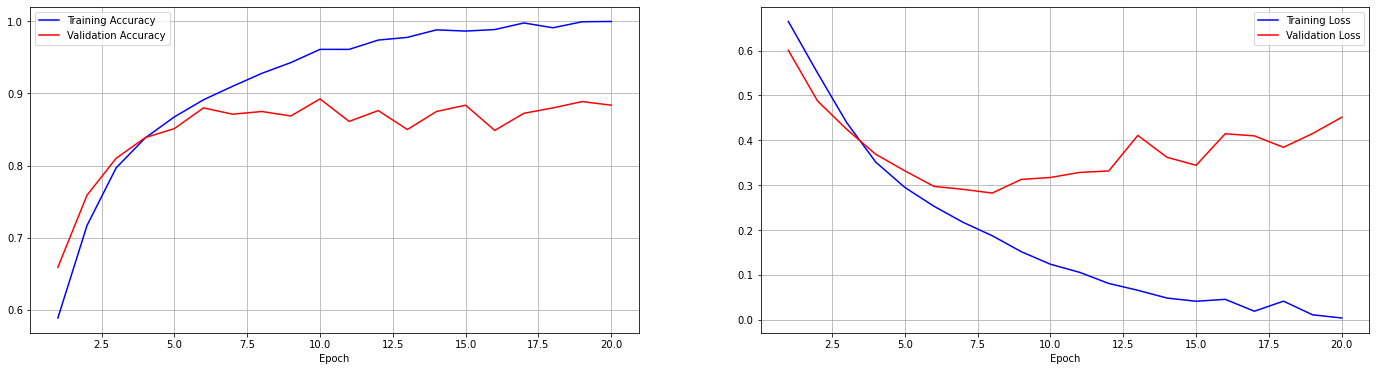

Best Validation Accuracy Score 0.89250, is for epoch 10


In [16]:
plot_results(history)
best_epoch = get_best_epcoh(history)

# second model

In [12]:
from PIL import Image
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator

# Train using Convolution

In [13]:
def build_cnn(display_summary =False):
    model = models.Sequential()
    model.add( layers.Conv2D(32, (3,3),  activation= 'relu', input_shape = (150, 150, 3)) )
    model.add(layers.MaxPooling2D((2,2)))

    model.add( layers.Conv2D(64, (3,3),  activation= 'relu') )
    model.add(layers.MaxPooling2D((2,2)))

    model.add( layers.Conv2D(128, (3,3),  activation= 'relu') )
    model.add(layers.MaxPooling2D((2,2)))

    model.add( layers.Conv2D(128, (3,3),  activation= 'relu') )
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation= 'relu'))
    model.add(layers.Dense(1, activation= 'sigmoid'))

    model.compile(loss = 'binary_crossentropy',
                  optimizer = optimizers.RMSprop(lr = 1e-4),
                  metrics = ['acc']
                  )
    if display_summary:
       model.summary()
    return model

# Data Preprocessing

In [14]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation' )


train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
                                                   train_dir,              
                                                   target_size = (150,150), #Resize images to 150 X 150
                                                   batch_size  = 20,
                                                   class_mode = 'binary'
                                                   )
validation_generator = test_datagen.flow_from_directory(
                                                   validation_dir,              
                                                   target_size = (150,150), #Resize images to 150 X 150
                                                   batch_size  = 20,
                                                   class_mode = 'binary'
                                                   )

for data_batch, labels_batch, in train_generator:
    print('Data Batch shape:', data_batch.shape)
    print('Labels Batch shape:', labels_batch.shape)
    break

Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Data Batch shape: (20, 150, 150, 3)
Labels Batch shape: (20,)


# Fit Model

In [15]:
model = build_cnn(display_summary = True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [16]:
%%time
history = model.fit_generator(
                            train_generator,
                            steps_per_epoch = 120,  # = num_train_images/batch size(2400/20)
                            epochs = 20,
                            validation_data = validation_generator,
                            validation_steps = 40  # = num_valid_images/batch_size
                             )
model.save('cat_and_dogs.h5')

Epoch 1/20
120/120 [==============================] - 72s 601ms/step - loss: 0.6740 - acc: 0.5704 - val_loss: 0.6240 - val_acc: 0.6637
Epoch 2/20
120/120 [==============================] - 71s 591ms/step - loss: 0.5676 - acc: 0.7088 - val_loss: 0.5695 - val_acc: 0.6812
Epoch 3/20
120/120 [==============================] - 70s 585ms/step - loss: 0.4731 - acc: 0.7713 - val_loss: 0.4381 - val_acc: 0.8037
Epoch 4/20
120/120 [==============================] - 70s 585ms/step - loss: 0.4213 - acc: 0.8071 - val_loss: 0.4312 - val_acc: 0.8062
Epoch 5/20
120/120 [==============================] - 70s 583ms/step - loss: 0.3723 - acc: 0.8342 - val_loss: 0.3894 - val_acc: 0.8200
Epoch 6/20
120/120 [==============================] - 70s 581ms/step - loss: 0.3351 - acc: 0.8575 - val_loss: 0.3661 - val_acc: 0.8475
Epoch 7/20
120/120 [==============================] - 78s 647ms/step - loss: 0.2964 - acc: 0.8742 - val_loss: 0.3488 - val_acc: 0.8575
Epoch 8/20
120/120 [==============================] - 7